<a href="https://colab.research.google.com/github/JonasSouza871/Data_Science/blob/main/Estat%C3%ADstica_com_Python_Frequencias_e_medida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qual seu tipo de dado?

-----------

## Dataset do projeto

- Dados do IBGE, por federação, e com o nome dos estados na descrição, com altura, cor de raça, altura e renda

- Rendas inválidas foram retirados

In [93]:
import pandas as pd

In [94]:
dados = pd.read_csv('/content/dados.csv') #carrega o dataset utilizando a função read_csv do pandas

In [95]:
dados #todos os dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## Tipos de dados

- Para cada tipo de dado teremos uma analise estatística diferente. Por isso é importante entender qual o dado será analisados

 - Variáveis qualitativas - > Qualidade de uma variavel, cor, sexo, Unidade da federação.

 - Variável quantitativa ->  da para contar, idade, renda e etc.



# Distribuição de frequências:
------

## Distribuição de frequências qualitativas - Método 1

In [96]:
dados['Sexo'].value_counts() # numero de valores de categorias distintas na coluna dados['sexo']

,count
Sexo,
0,53250
1,23590


In [97]:
frequencia = dados['Sexo'].value_counts() #armazena nessa variavel

In [98]:
dados['Sexo'].value_counts(normalize= True) #normalização como se o total valesse 1
# 53250         -  x
# 53250 + 23590 - 100
# Regra de 3 para o calculo da normalização

,proportion
Sexo,
0,0.692998
1,0.307002


In [99]:
 #para transformar em percentual:
 dados['Sexo'].value_counts(normalize= True) * 100
 percentual_dados_sexo =  dados['Sexo'].value_counts(normalize= True) * 100 #armazenamento nessa variavel

In [100]:
# criando um dataframe para armazenar a frequencia e porcentagem de cada dado de sexo
distribuicao_freq_qualitativas = pd.DataFrame( #criacao do dataframe apartir de um dicionario json, formato "Titulo : " variavel
    {'frequência' : frequencia,
      'percentual(%)' : percentual_dados_sexo
    }
)
# No dataframe é criado 2 colunas com os dados da variaveis que foram dadas acima.
distribuicao_freq_qualitativas

,frequência,percentual(%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [101]:
distribuicao_freq_qualitativas.rename(index = {0: "Masculino", 1: "Feminino"},inplace = True)
 # Com a função rename, o index na linha 0 é substituido por masculo
 # e a linha 1 é substituido por feminino
 # o comando inplace = true faz com que as informações fiquem salvo no dataframe
 # é algo parecido como se eu tivesse chamando uma nova variavel com as novas informações

In [102]:
distribuicao_freq_qualitativas.rename_axis('Sexo',inplace = True)
#axis = eixo
# renameia o nome da coluna de index com o nome Sexo

In [103]:
distribuicao_freq_qualitativas

,frequência,percentual(%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


## Distribuição de frequências qualitativas - Método 2

In [104]:
sexo = { 0: 'Masculina',
        1: 'Feminino'}

cor = { 0 : 'Indígena',
       2: 'Branca',
        4:'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [105]:
frequencia = pd.crosstab(dados['Sexo'], dados['Cor']) # pd.crosstab(linha, coluna)
# dados['sexo] -> Linha
# dados['cor] -> coluna
#função cross tab permite fazer o cruzamento de dados, no caso foi possivel fazer o cruzamento entre o sexo e a cor da população analisada
# o que cada um significa, pode ser visto acima.

frequencia

# A função pd.crosstab cria uma tabela cruzada (ou tabela de contingência)
# para mostrar a frequência de combinações entre duas variáveis categóricas.

# dados['Sexo']: Valores categóricos (como "Masculino" e "Feminino") serão as linhas da tabela.
# dados['Cor']: Valores categóricos (como "Branco", "Negro", etc.) serão as colunas da tabela.

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [106]:
frequencia.rename(index = sexo, inplace= True)

# Alter os valores do  index (linhas) pelo valores do dicionario dado acima.
# sexo = { 0: 'Masculina',
#       1: 'Feminino'}
frequencia.rename(columns= cor, inplace = True) # Substitue as colunas pelos nomes dados no dicionario acima,
#cor = { 0 : 'Indígena',
#       2: 'Branca',
#       4:'Preta',
#        6: 'Amarela',
#        8: 'Parda',
#        9: 'Sem declaração'}
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculina,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


- Para normalizar os dados e transformar em porcentagem:

In [107]:
Percentual = pd.crosstab(dados['Sexo'], dados['Cor'], normalize = True) #Normaliza os valores

In [108]:
Percentual = pd.crosstab(dados['Sexo'], dados['Cor'], normalize = True)*100 #transforma em porcentagem
Percentual.rename(index = sexo, inplace= True)
Percentual.rename(columns= cor, inplace = True)

In [109]:
Percentual #porcentagem de cada por tabela

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculina,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [110]:
Percentual.loc['Total_percentual'] = Percentual.sum(axis= 'rows')
#cria um novo index -> linha chamada "Total_Percentual"
#Esse novo index ira armazenas a soma de cada linha anterior para cada coluna diferente

In [111]:
Percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculina,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867
Total_percentual,0.464602,41.404217,10.920094,0.458095,46.752993


- Novo projeto rapido:
- Nesse novo projeto irei calcular à média de renda de cada sexo e cor por meio da função aggfunc, que define qual calculo será aplicado sobre o dataframe original

In [112]:
Renda_por_sexo_e_cor = pd.crosstab(
    dados['Sexo'],
    dados['Cor'],
    aggfunc = 'mean', #aplica media dos dados que serao escolhidos com Valores
    values = dados['Renda'])  #Os dados de renda serao escolhidos como vlaores a serem exibidos
Renda_por_sexo_e_cor.rename(index = sexo, inplace= True)
Renda_por_sexo_e_cor.rename(columns= cor, inplace = True)
Renda_por_sexo_e_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculina,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [113]:
# Para normalizar os dados e deixar mais visivel essa diferença em porcentagem:
Renda_por_sexo_e_cor = pd.crosstab(
    dados['Sexo'],
    dados['Cor'],
    aggfunc = 'mean', #aplica media dos dados que serao escolhidos com Valores
    values = dados['Renda'],
    normalize= True)*100  #Os dados de renda serao escolhidos como vlaores a serem exibidos
Renda_por_sexo_e_cor.rename(index = sexo, inplace= True)
Renda_por_sexo_e_cor.rename(columns= cor, inplace = True)
Renda_por_sexo_e_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculina,4.929843,13.333934,7.309519,21.685491,7.563441
Feminino,11.231316,9.615612,5.170866,13.796959,5.363018


In [114]:
# Para exibir mais uma linha com a soma total das porcentagens:
Renda_por_sexo_e_cor.loc['Total_percentual'] = Renda_por_sexo_e_cor.sum(axis= 'rows')
Renda_por_sexo_e_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculina,4.929843,13.333934,7.309519,21.685491,7.563441
Feminino,11.231316,9.615612,5.170866,13.796959,5.363018
Total_percentual,16.161160,22.949546,12.480386,35.482450,12.926459


In [120]:
!pip install matplotlib

In [123]:
import matplotlib.pyplot as plt

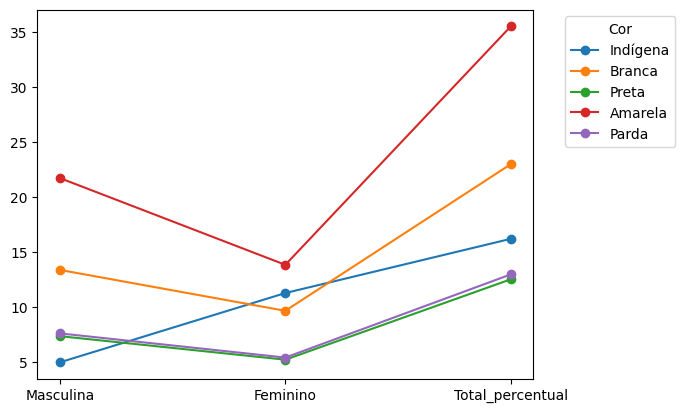

In [142]:
for cor in Renda_por_sexo_e_cor.columns:
    plt.plot(
        Renda_por_sexo_e_cor.index,  # Índices são os sexos
        Renda_por_sexo_e_cor[cor],  # Valores para cada cor
        label=cor, marker='o' #coloca uma label com as cores
    )

plt.legend(title='Cor', bbox_to_anchor=(1.05, 1), loc='upper left') #legenda com cada nome por cor


- Vemo pelo gráfico que as cores amarela e branca sao as que mais concentram riquezas enquanto que a negra e parda sao as raças mais pobres por renda nesse dataset

## Classes Personalizadas

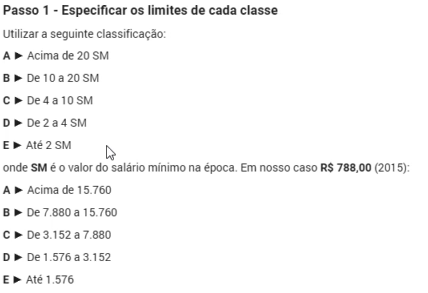

In [143]:
dados['Renda'].min() #valor minimo de renda

0

In [144]:
dados['Renda'].max() #valor máximo de renda

200000

In [146]:
classes = [0, 1576, 3152, 7880, 15760,200000] #valores para classe A,B,C,D e E

In [148]:
labels = ['E','D','C','B','A'] #labels dos tipos de salário

In [149]:
# Utilizando o pd.cut() para categorizar os valores da coluna 'Renda' em faixas
pd.cut(
    x = dados['Renda'],  # A variável 'x' recebe a coluna 'Renda' do DataFrame 'dados', ou seja, os valores de renda.
    bins = classes,  # intervalo definido acima entre as classes
    # 'classes' deve ser uma lista ou array que define os limites das faixas (por exemplo, [0, 1000, 5000, 10000])
    labels = labels,  # A variável 'labels' define os nomes das faixas ou categorias.
    # 'labels' deve ser uma lista com o nome que será dado a cada faixa (por exemplo, ['A,b,c,d,e])
    include_lowest = True  # Esse parâmetro define que o valor do limite inferior da primeira faixa será incluído na categoria.
    # Por exemplo, se a primeira faixa é [0, 1000], o valor 0 será considerado dentro da faixa,porem o mil nao
)

,Renda
0,E
1,E
2,E
3,C
4,E
...,...
76835,E
76836,E
76837,E
76838,E


- apartir da função .cut é possivel visualizar a classificação de rendas em grupos especificos
- por exemplo: o cidadao 0 se enquandra na renda E, o cidadao 1 se enquandra na regra E tambem e etc;

In [151]:
dados.head() #para conferir

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


- A classificação feita confere com a realidade.

In [153]:
# Colocando essas informações em uma variavel:
renda_classificada = pd.cut( x = dados['Renda'],
       bins = classes,
        labels = labels,
        include_lowest = True)

In [154]:
pd.value_counts(renda_classificada) #Para saber quantos pessoas se enquandram em cada classe

<ipython-input-154-d667b7102c99>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(renda_classificada) #Para saber quantos pessoas se enquandram em cada classe


,count
Renda,
E,49755
D,16700
C,7599
B,2178
A,608


- Existem 49755 cidadoes na classe E

- proximo passo é transformar tudo em porcentagem como sempre.

In [156]:
pd.value_counts(renda_classificada,normalize = True)*100

<ipython-input-156-5c33d47c8715>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(renda_classificada,normalize = True)*100


,proportion
Renda,
E,64.751432
D,21.733472
C,9.889381
B,2.834461
A,0.791255


- 64,75% das pessoas pertecem a classe E
- 21,73% das pessoas pertecem a Classe C e etc